
Nihar Lohar

I079

Practicumm ATML



Aim : Anomaly detection using Autoencoders


Solution Proposed : Anomaly detection on MNIST Dataset where the model is trained on 0-8 digits where digit 9 is marked as anomaly and model tries to reconstruct it from the previous learned features.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [13]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)


In [14]:
normal_digits = list(range(9))  # Digits 0-8
train_mask = np.isin(y_train, normal_digits)
test_mask = np.isin(y_test, normal_digits)

x_train_normal = x_train[train_mask]
x_test_normal = x_test[test_mask]
y_test_normal = y_test[test_mask]


In [15]:
#keeping digit 9 as anomaly
test_anomaly_mask = (y_test == 9)
x_test_anomaly = x_test[test_anomaly_mask]
y_test_anomaly = y_test[test_anomaly_mask]

inputSize = 28 * 28
latentSize = 512
inputLayer = Input(shape=(inputSize,))
encode = Dense(latentSize, activation='relu')(inputLayer)
decode = Dense(inputSize, activation='sigmoid')(encode)
autoencoder = Model(inputLayer, decode)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

Epoch 1/30
212/212 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0653 - val_loss: 0.0141
Epoch 2/30
212/212 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 0.0120 - val_loss: 0.0072
Epoch 3/30
212/212 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0069 - val_loss: 0.0050
Epoch 4/30
212/212 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0049 - val_loss: 0.0040
Epoch 5/30
212/212 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 6/30
212/212 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 7/30
212/212 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 8/30
212/212 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 9/30
212/212 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 10/30
212/212 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 11/30
212/212 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 12/30
212/212 ━━━━━━━━━━━━━━

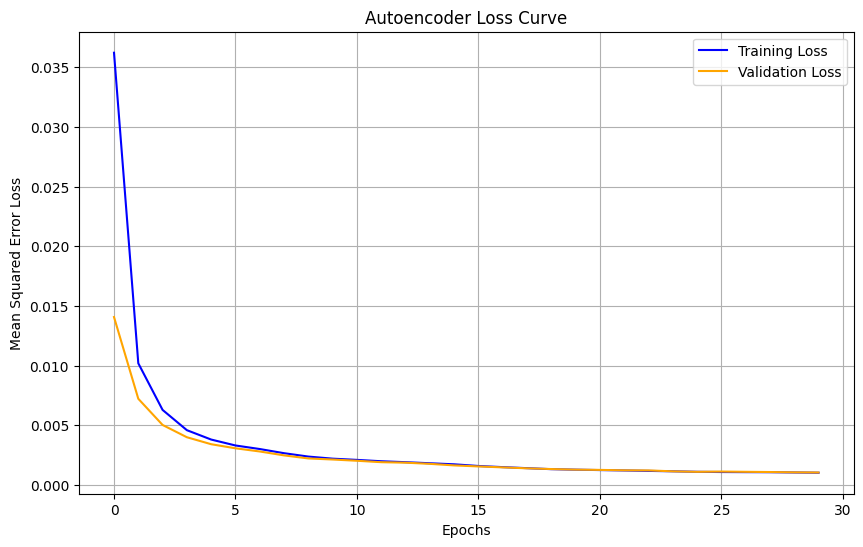

In [16]:
history = autoencoder.fit(x_train_normal, x_train_normal,
                          epochs=30,
                          batch_size=256,
                          validation_data=(x_test_normal, x_test_normal),
                          verbose=1)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Autoencoder Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.grid()
plt.show()

In [17]:
reconstructed_normal = autoencoder.predict(x_test_normal)
reconstructed_anomaly = autoencoder.predict(x_test_anomaly)

normal_errors = np.mean((x_test_normal - reconstructed_normal) ** 2, axis=1)
anomaly_errors = np.mean((x_test_anomaly - reconstructed_anomaly) ** 2, axis=1)

threshold = np.percentile(normal_errors, 95)  # 95th percentile of normal errors
print(f"Anomaly Detection Threshold: {threshold:.4f}")

281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Anomaly Detection Threshold: 0.0033


In [19]:
y_pred_normal = normal_errors > threshold
y_pred_anomaly = anomaly_errors > threshold

accuracy = (np.sum(y_pred_normal == False) + np.sum(y_pred_anomaly == True)) / (len(y_pred_normal) + len(y_pred_anomaly))
print(f"Anomaly Detection Accuracy: {accuracy * 100:.2f}%")

Anomaly Detection Accuracy: 85.83%


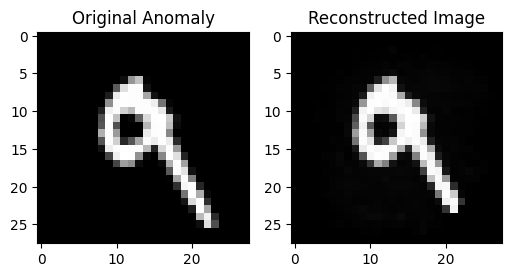


Image 1 Total Reconstruction Error: 3.0911


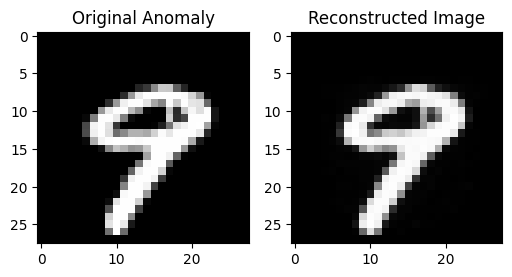


Image 2 Total Reconstruction Error: 0.5932


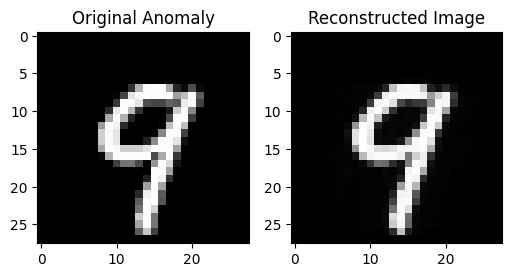


Image 3 Total Reconstruction Error: 0.5225


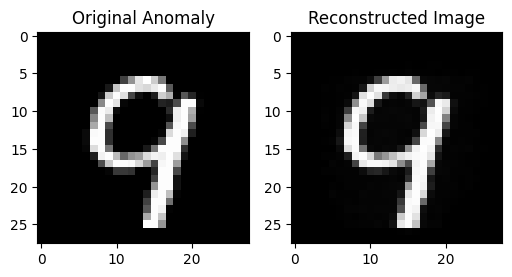


Image 4 Total Reconstruction Error: 0.4897


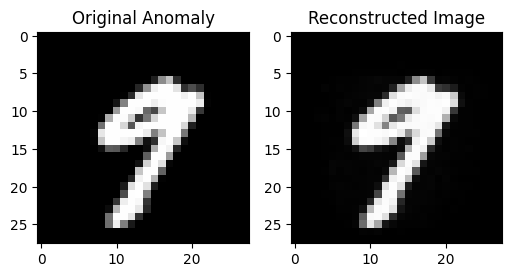


Image 5 Total Reconstruction Error: 0.3204


In [ ]:
for i in range(5):
    plt.figure(figsize=(6, 3))

    plt.subplot(1, 2, 1)
    plt.title("Original Anomaly")
    plt.imshow(x_test_anomaly[i].reshape(28, 28), cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title("Reconstructed Image")
    plt.imshow(reconstructed_anomaly[i].reshape(28, 28), cmap='gray')

    plt.show()

    total_error = np.sum((x_test_anomaly[i] - reconstructed_anomaly[i]) ** 2)
    print(f"\nImage {i+1} Total Reconstruction Error: {total_error:.4f}")
